## 실제 데이터로 작업하기

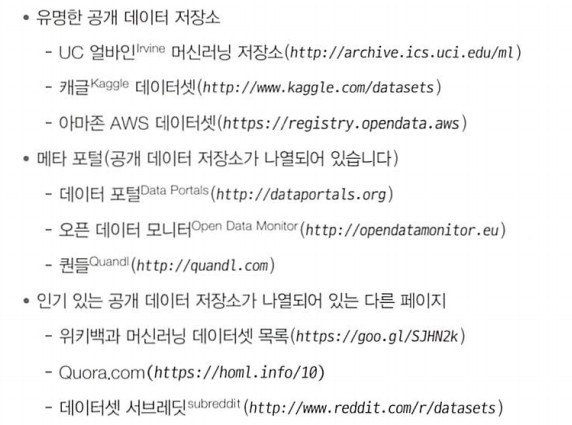

## 큰그림 보기

### 문제정의

모델의 출력이 여러가지 다른 신호와 함께 머신러닝 시스템에 입력으로 사용된다. 올바르게 예측하는 것은 매우 중요하다.

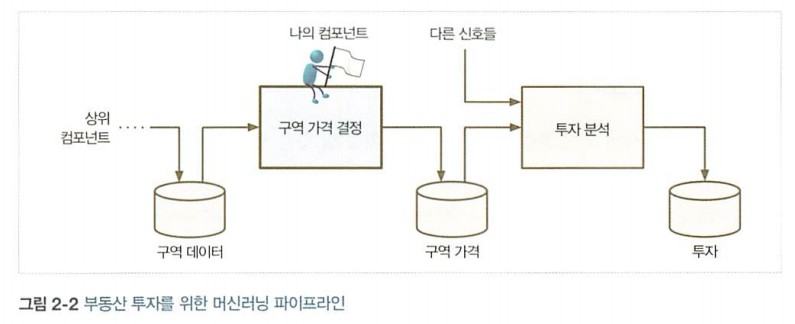

데이터 처리 컴포넌트들이 연속되어 있는 것을 데이터 파이프라인이라고 한다. 컴포넌트들은 비동기적으로 동작한다. 각 컴포넌트는 많은 데이터를 추출해 처리하고 그 결과를 다른 데이터 저장소로 보낸다. 일정 시간 후 파이프라안의 다음 컴포넌트가 그 데이터를 추출해 자신의 출력 결과를 만든다. 각 컴포넌트는 독립적이다. 컴포넌트 사이의 인터페이스는 데이터 저장소 뿐이다. 한 컴포넌트가 다운되더라도 하위 컴포넌트는 문제가 생긴 컴포넌트의 마지막 출력을 사용해 평상시처럼 동적할수있다.

레이블된 훈련 샘플이 있으니 전형적인 지도 학습이다. 값을 예측 해야되서 회귀문제다. 예측에 사용할 특성이 여러개 이므로 다중 회귀다. 각 구역마다 하나의 값을 예측하므로 단변량 회귀다. 구역마다 여러값을 예측한다면 다변량 회귀다. 일반적인 배치학습이 적절하다.

### 성능 츶겅 지표 선택

회귀문제의 전형적인 성능지표는 평균 제곱근 오차다. 오차가 커질수록 이 값은 커지므로 얼마나 많은 오류가 있는지 가늠해 준다.

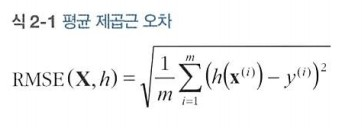

*   m= 측정할수있는 데이터셋의 샘플수
*   x = 데이터셋에 있는 i번째 샘플의 전체 특성값의 벡터, y는 해당 레이블이다.
*   X = 데이터셋에 있는 모든 샘플의 모든 특성값을 포함하는 행렬
*   h = 시스템의 예측 함수며 가설이다. 
*   시스템이 하나의 샘플특성 벡터x를 받으면 그 샘플에 대한 예측값 y_햇을 
ㄹ출력한다.










이상치로 보이는 구역이 많으면 평균 절대 오차를 사용한다.

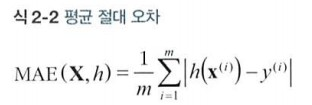

RMSE와 MAE 모두 예측값의 벡터와 타깃값이 벡터 사아의 거리를 재는 방법이다.

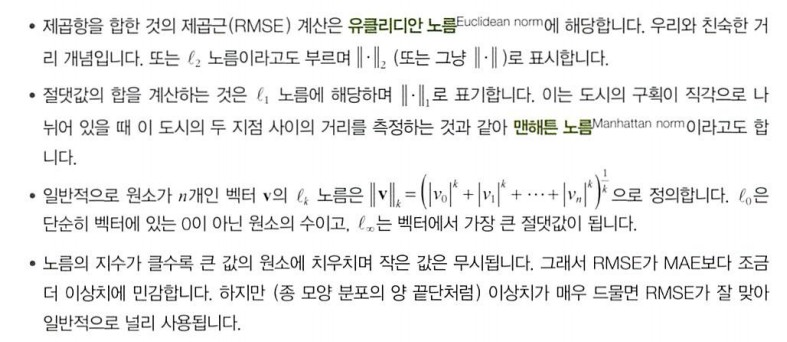

### 가정 검사

머신러닝 시스템의 출력한 구역의 가격이 다음 시스템으로 입력될때 하위시스템에서 값을 카테고리로 바꾸고 가격대신 카테고리를 사용한다면 분류작업을 하면된다.

## 데이터 가져오기

### 작업환경 만들기

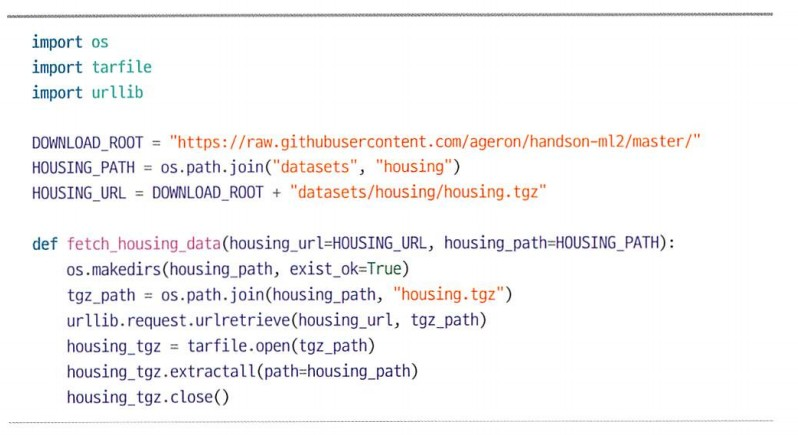

fetch_housing_data()를 호출하려면 현재 작업공간에 datasets/housing디렉토리를 만들고 housing.tgz파일을 내려받고 같은 디렉터리의 압축을 풀어 housing.csv파일을 만든다.

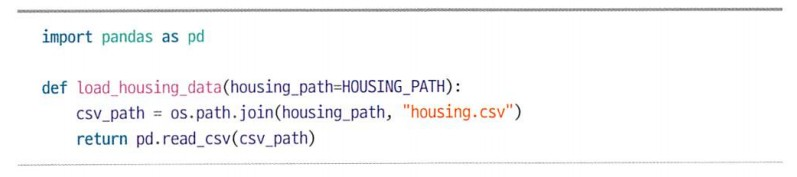

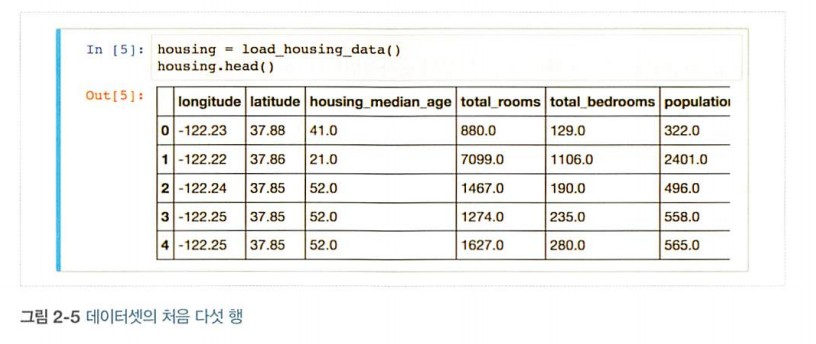

각행은 하나의 구역을 나타낸다

info() 메서드는 데이터의 대한 간략한 설명과 특히 전체 행 수. 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용하다,

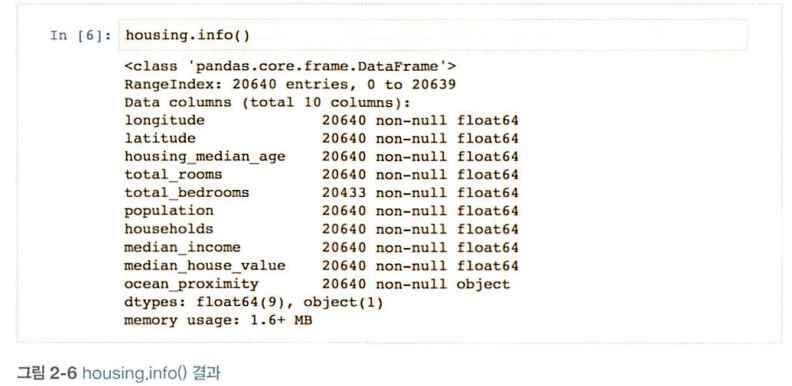

데이터 타입이 object이므로 CSV파일로 읽으면 텍스트 특성일 것이다. 어떤 카테고리가 얼마나 많은 구역이 있는지 value_counts()로 확인한다.

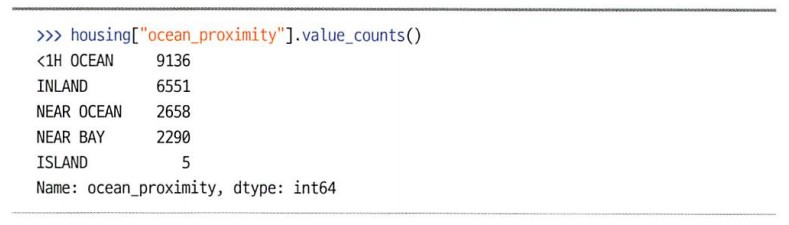

describe()는 숫자형 특성의 요약정보를 보여준다.

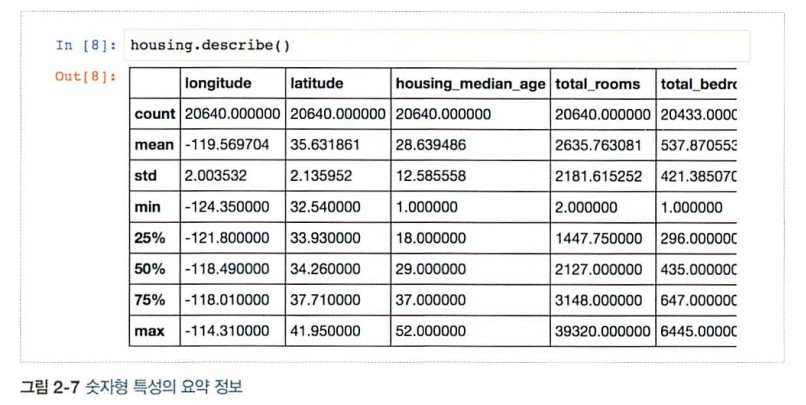

데이터 형태를 빠르게 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것이다. 히스토그램은 주어진 값의 범위(수평축)에 속한 샘플수(수직축)를 나타낸다. 특성마다 따로 나타낼수있고 전체 데이터셋에 대해 hist()메서드를 호출하면 모든 숫자형 특성애 대한 히스토그램이 출력된다.

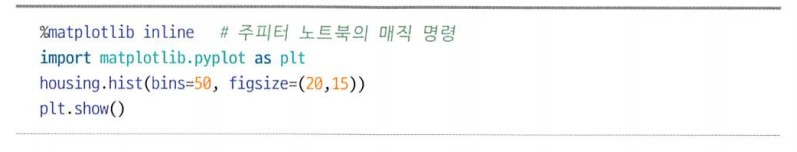

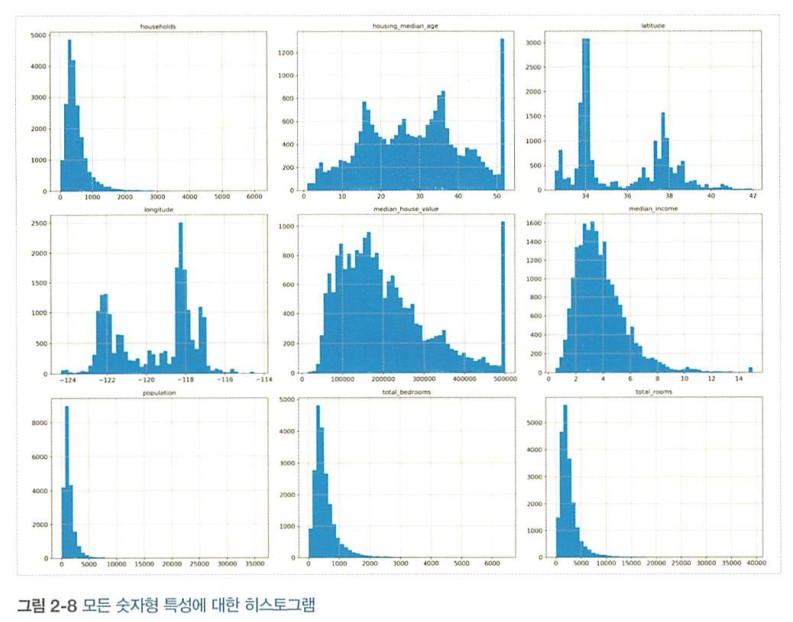

### 데이터 세트 만들기

테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지 모른다. 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않는다 이를 데이터 스누핑 편향이라고 한다.

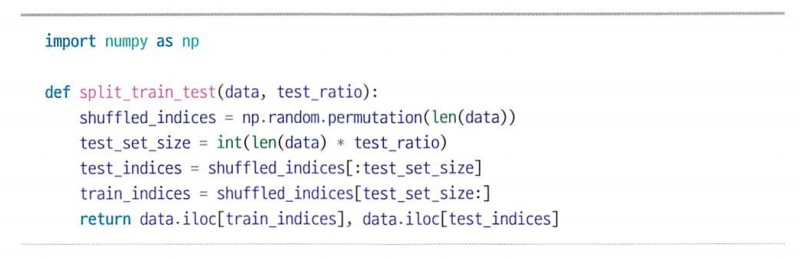

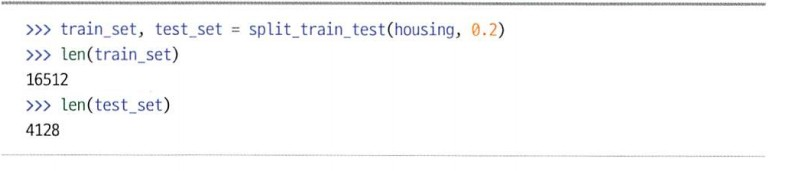

프로그램을 다시 실행하면 다른 테스트 세트가 생성된다. 여러번 계속하면 전체 데이터셋을 보는 셈이므로 피해야한다.

처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러들이는 것이다. 다른 방법은 항상 같은 난수가 인덱스가 생성되도록  #np.random.permutation() 을 호출하기 전에 난수 발생기의 초기값을 지정하는 것이다.(np.random.seed(42))




다음번에 업데이트된 데이터셋을 사용하려면 문제가 된다. 업데이트 한 후에도 안정적인 훈련/테스트 분할을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것이다. 각 샘플마다 해시값을 계산하여 해시 최댓값의 20%보다작거나 같은 샘플만 테스트 세트로 보낼수 있다. 이렇게하면 여러번 반복 실행해도 테스트 세트가 동일하게 유지된다.

86p